## Лабораторная работа №1 | Вариант 5

Выполнил: Домкин Павел Павлович М8О-310Б-23

### 1. Numpy

In [1]:
import numpy as np

1. Создайте единичную матрицу размером 3х3

In [2]:
matrix1 = np.eye(3)
print(matrix1)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


2. Создайте кастомный dtype который описывает цвет состоящий из 4х unsigned bytes(RGBA пиксель)

In [3]:
rgba_dtype = np.dtype([
    ('r', 'uint8'),
    ('g', 'uint8'),
    ('b', 'uint8'),
    ('a', 'uint8')
])

pixel = np.array((255, 128, 64, 200), dtype=rgba_dtype)
print(pixel)

(255, 128, 64, 200)


3. Как игнорировать все numpy warnings(не рекомендуем к использованию)?

In [4]:
np.seterr(all="ignore")
result = np.sqrt(-1)
print(result)

nan


4. Создайте случайный вектор размера 10 и отсортируйте его

In [5]:
vector = np.random.random(4)
print("Исходный вектор:")
print(vector)

sorted_vector = np.sort(vector)
print("\nОтсортированный вектор:")
print(sorted_vector)

Исходный вектор:
[0.45716711 0.54542932 0.32403461 0.73826294]

Отсортированный вектор:
[0.32403461 0.45716711 0.54542932 0.73826294]


5. Создайте read-only массив(неизменяемый)

In [6]:
arr = np.array([1, 2, 3, 4, 5])
print("Исходный массив:", arr)
arr.flags.writeable = False

try:
    arr[0] = 10
except ValueError as e:
    print("Ошибка:", e)

Исходный массив: [1 2 3 4 5]
Ошибка: assignment destination is read-only


6. Рассмотрим случайную матрицу размером 10х2, представляющую декартовы координаты, преобразуем их в полярные координаты

In [7]:
coords = np.random.random((10, 2)) * 10 - 5
print("Декартовы координаты (x, y):")
print(coords)

x = coords[:, 0]
y = coords[:, 1]
r = np.sqrt(x**2 + y**2)
theta = np.arctan2(x, y)

polar_coords = np.column_stack((r, theta))

print("\nПолярные координаты (r, θ):")
print(polar_coords)

Декартовы координаты (x, y):
[[ 4.2694371   3.91209113]
 [-2.59006025  2.74839034]
 [ 0.39928011  3.16094287]
 [-4.26785789  4.89580628]
 [ 2.67105442 -4.12738449]
 [ 0.04516353  4.93209684]
 [ 2.66512828 -3.77765634]
 [-0.25458753  3.69939577]
 [ 0.57620662 -3.98992009]
 [ 0.1746453   1.900181  ]]

Полярные координаты (r, θ):
[[ 5.79072968  0.82904759]
 [ 3.77651448 -0.75574842]
 [ 3.18606096  0.1256513 ]
 [ 6.49488492 -0.71697922]
 [ 4.91628258  2.56722056]
 [ 4.93230362  0.00915681]
 [ 4.62315868  2.5271864 ]
 [ 3.70814561 -0.06871034]
 [ 4.03131199  2.99816867]
 [ 1.90818993  0.09165233]]


7. Создайте структурированный массив с координатами x и y, охватывающий область [0,1]x[0,1]

In [8]:
nx, ny = 5, 5

x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)

X, Y = np.meshgrid(x, y) # Создаём сетку 2D

x_coords = X.ravel() # Преобразуем 2D в 1D по порядку
y_coords = Y.ravel()

structured_array = np.array(list(zip(x_coords, y_coords)), dtype=[('x', 'f'), ('y', 'f')])
print(structured_array)

[(0.  , 0.  ) (0.25, 0.  ) (0.5 , 0.  ) (0.75, 0.  ) (1.  , 0.  )
 (0.  , 0.25) (0.25, 0.25) (0.5 , 0.25) (0.75, 0.25) (1.  , 0.25)
 (0.  , 0.5 ) (0.25, 0.5 ) (0.5 , 0.5 ) (0.75, 0.5 ) (1.  , 0.5 )
 (0.  , 0.75) (0.25, 0.75) (0.5 , 0.75) (0.75, 0.75) (1.  , 0.75)
 (0.  , 1.  ) (0.25, 1.  ) (0.5 , 1.  ) (0.75, 1.  ) (1.  , 1.  )]


8. Учитывая два массива X и Y, постройте матрицу Коши $C$ ($C_{ij} =\frac{1}{x_i - y_j}$)

In [9]:
x = np.random.normal(size=(5))
y = np.random.normal(size=(5))
print("X:", x)
print("Y:", y)

C = 1 / (x[:, None] - y[None, :])
print("\nМатрица Коши C:")
print(C)

X: [-1.15809765  0.75079264  0.81423084 -0.21525606  1.64183653]
Y: [-0.3604282   1.71362026 -0.96415776 -1.02700886 -1.06813834]

Матрица Коши C:
[[ -1.25365214  -0.34822362  -5.1562368   -7.62841776 -11.11613718]
 [  0.89991112  -1.03860751   0.58310724   0.56249249   0.54977347]
 [  0.85131086  -1.11186543   0.5623068    0.54311234   0.53124542]
 [  6.88837383  -0.51843656   1.33528874   1.23190212   1.17249476]
 [  0.49943446 -13.93073338   0.3837307    0.37469387   0.36900711]]


9. Как конвертировать массив float(32 bit) к массиву целых чисел (integer 32 bit) in place?

In [10]:
arr = np.array([1.1, 2.2, 3.3, 4.4, 5.5], dtype=np.float32)
print("До:", arr, arr.dtype)

arr[:] = arr.astype(np.int32)
print("После:", arr, arr.dtype)

До: [1.1 2.2 3.3 4.4 5.5] float32
После: [1. 2. 3. 4. 5.] float32


10. Как случайно заменить p элементов в 2D массиве?

In [11]:
arr = np.random.randint(0, 10, size=(4, 5))
print("Исходный массив:")
print(arr)

p = np.random.randint(3, 8)
print(p)

random_indices = np.random.choice(arr.size, size=p, replace=False)

new_values = np.random.randint(111, 222, size=p)

np.put(arr, random_indices, new_values)

print("\nМассив после замены p элементов:")
print(arr)

Исходный массив:
[[1 4 5 8 9]
 [3 6 1 3 0]
 [5 2 9 8 4]
 [9 5 3 4 1]]
3

Массив после замены p элементов:
[[  1   4   5   8   9]
 [207   6   1   3   0]
 [  5   2   9   8   4]
 [  9   5   3 125 210]]


### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом 

Классический начальный набор данных - данные пассажиров титаника.

Файл: `data.csv`

```
PassangerId - уникальный номер пассажира
Survived - выжил человек или нет
Pclass - класс обслуживания
Name - имя человека, обращение к ней/нему
Sex - пол человека
Age - возраст на момент крушения
SibSp - количество братьев и сестер / супругов на борту "Титаника"
Parch - количество родителей / детей на борту "Титаника"
Ticket - номер билета
Fare - стоимость проезда для пассажиров
Cabin - каюта
Embarked - причал отбытия. C = Cherbourg Q = Queenstown S = Southampton
```

In [12]:
import pandas as pd

In [13]:
df = pd.read_csv('data.csv')

1. Узнайте сколько было на борту человек

In [14]:
print(f"Всего на борту было {len(df)} человек.")

Всего на борту было 891 человек.


2. Какой медианный и средний возраста пассажиров

In [15]:
print(f"Средний возраст пассажиров - {df['Age'].mean()}, медианный - {df['Age'].median()}")

Средний возраст пассажиров - 29.69911764705882, медианный - 28.0


3. Посчитайте процент выживаемости детей(до 16 лет) и взрослых

In [32]:
children = df[df['Age'] <= 16]
adults = df[df['Age'] > 16]
print(f"Процент выживших детей (до 16 лет): {children['Survived'].mean() * 100:.2f}%")
print(f"Процент выживших взрослых (16 и старше): {adults['Survived'].mean() * 100:.2f}%")

Процент выживших детей (до 16 лет): 55.00%
Процент выживших взрослых (16 и старше): 38.27%


4. Верна ли гипотеза, что женщины и дети сажались в шлюпки первыми и выживали больше?

In [17]:
survival_by_sex = (df.groupby('Sex')['Survived'].mean() * 100).to_string()
print(f"Процент выживших по полу: {survival_by_sex}\n")

df['AgeGroup'] = df['Age'].apply(lambda x: 'Child' if x < 16 else 'Adult')
survival_by_age = (df.groupby('AgeGroup')['Survived'].mean() * 100).to_string()
print(f"Процент выживших по возрасту: {survival_by_age}\n")

adults_df = df[df['Age'] >= 16]
survival_adults_by_sex = (adults_df.groupby('Sex')['Survived'].mean() * 100).to_string()
print(f"Процент выживших взрослых по полу: {survival_adults_by_sex}")

Процент выживших по полу: Sex
female    74.203822
male      18.890815

Процент выживших по возрасту: AgeGroup
Adult    36.262376
Child    59.036145

Процент выживших взрослых по полу: Sex
female    77.522936
male      17.433414


5. Зависит ли выживаемость от класса обслуживания?

In [18]:
survival_by_class = df.groupby('Pclass')['Survived'].mean() * 100
print(f"Процент выживших по классу обслуживания: {survival_by_class.to_string()}")

Процент выживших по классу обслуживания: Pclass
1    62.962963
2    47.282609
3    24.236253


6. Посчитайте средний возраст умерших женщин и мужчин

In [35]:
deceased_males = df[(df['Sex'] == 'male') & (df['Survived'] == 0)]['Age'].mean()
deceased_females = df[(df['Sex'] == 'female') & (df['Survived'] == 0)]['Age'].mean()

print(f"Средний возраст умерших мужчин: {deceased_males:.2f} лет")
print(f"Средний возраст умерших женщин: {deceased_females:.2f} лет")

Средний возраст умерших мужчин: 31.62 лет
Средний возраст умерших женщин: 25.05 лет


7. Различается ли процент выживаемости пассажиров с хотя бы одним родственником на борту и одиночек?

In [36]:
df['HasRelatives'] = (df['SibSp'] + df['Parch']) > 0
survival_by_relatives = df.groupby('HasRelatives')['Survived'].mean() * 100
print(f"Процент выживших: {survival_by_relatives.to_string()}")

Процент выживших: HasRelatives
False    30.353818
True     50.564972


8. Различается ли средняя стоимость билета у умерших и выживших пассажиров?

In [21]:
mean_fare_survived = df[df['Survived'] == 1]['Fare'].mean()
mean_fare_not_survived = df[df['Survived'] == 0]['Fare'].mean()

print(f"Средняя стоимость билета у выживших: ${mean_fare_survived:.2f}")
print(f"Средняя стоимость билета у умерших: ${mean_fare_not_survived:.2f}")

Средняя стоимость билета у выживших: $48.40
Средняя стоимость билета у умерших: $22.12


9. Выведите максимальный и минимальный возраст выживших пассажиров во 2 классе обслуживания

In [22]:
survivors_class2 = df[(df['Pclass'] == 2) & (df['Survived'] == 1)]
max_age = survivors_class2['Age'].max()
min_age = survivors_class2['Age'].min()

print(f"Максимальный возраст выжившего во 2-м классе: {max_age} лет")
print(f"Минимальный возраст выжившего во 2-м классе: {min_age} лет")

Максимальный возраст выжившего во 2-м классе: 62.0 лет
Минимальный возраст выжившего во 2-м классе: 0.67 лет


10. Подтвердите или опровергните гипотезу: молодым мужчинам(от 18 лет) выжить легче, чем более взрослым

In [38]:
males = df[(df['Sex'] == 'male')].copy() # Не знаю почему так, но без copy() ругается
males['AgeGroup'] = males['Age'].apply(lambda x: 'Young' if 18 <= x <= 35 else 'Older' if x > 35 else 'Under18')
males_adult = males[males['AgeGroup'] != 'Under18']
survival_by_age_group = males_adult.groupby('AgeGroup')['Survived'].mean() * 100
print(f"Процент выживших мужчин по возрастным группам: {survival_by_age_group.to_string()}")

Процент выживших мужчин по возрастным группам: AgeGroup
Older    18.055556
Young    17.529880


### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

1. Постройте гистограмму распределения возростов пассажиров

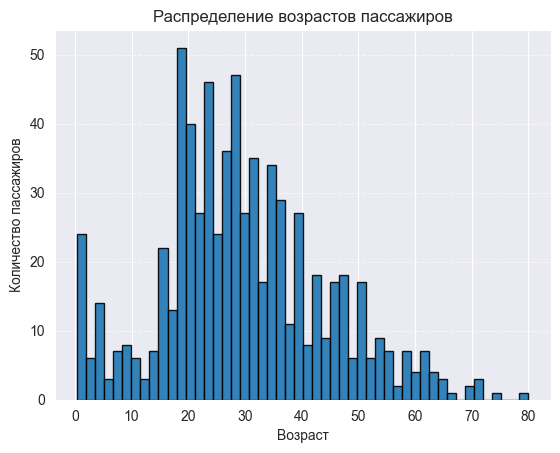

In [25]:
ages = df['Age'].dropna()

plt.hist(ages, bins=50, edgecolor='black', alpha=0.9)
plt.title('Распределение возрастов пассажиров')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

2. Постройте гистограммы распределения цен для пассажиров разных классов

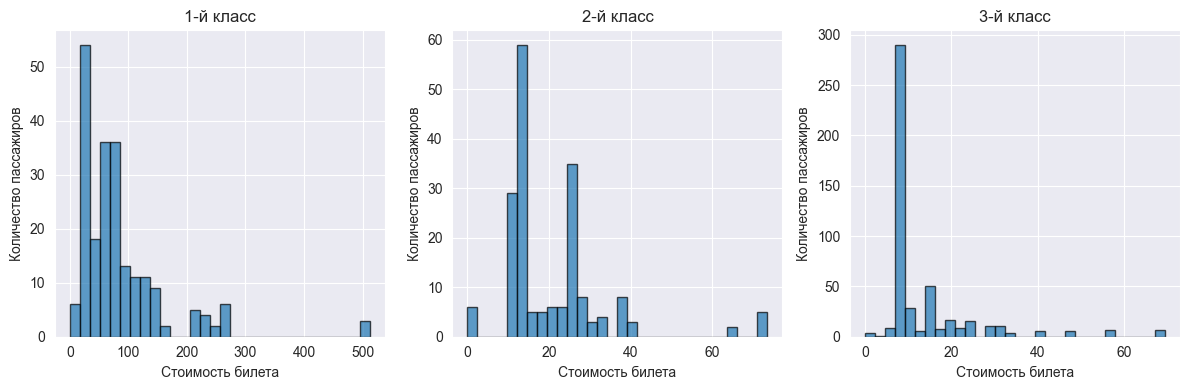

In [26]:
df = df[df['Fare'].notna()]

first_class = df[df['Pclass'] == 1]['Fare']
second_class = df[df['Pclass'] == 2]['Fare']
third_class = df[df['Pclass'] == 3]['Fare']

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(first_class, bins=30, edgecolor='black', alpha=0.7)
plt.title('1-й класс')
plt.xlabel('Стоимость билета')
plt.ylabel('Количество пассажиров')

plt.subplot(1, 3, 2)
plt.hist(second_class, bins=30, edgecolor='black', alpha=0.7)
plt.title('2-й класс')
plt.xlabel('Стоимость билета')
plt.ylabel('Количество пассажиров')

plt.subplot(1, 3, 3)
plt.hist(third_class, bins=30, edgecolor='black', alpha=0.7)
plt.title('3-й класс')
plt.xlabel('Стоимость билета')
plt.ylabel('Количество пассажиров')

plt.tight_layout() # Отступы между графиками
plt.show()

3. Постройте зависимость цены от возраста пассажира

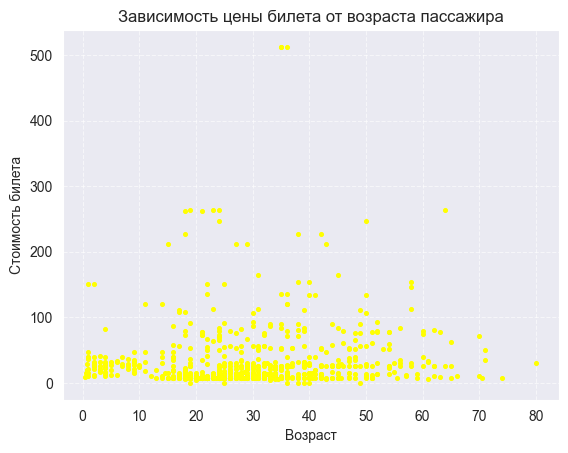

In [27]:
df_clean = df[['Age', 'Fare']].dropna()

plt.scatter(df_clean['Age'], df_clean['Fare'], alpha=1, color='yellow', s=7)
plt.title('Зависимость цены билета от возраста пассажира')
plt.xlabel('Возраст')
plt.ylabel('Стоимость билета')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

4. Постройте box plot отображающий распределение цен на билеты в разных классах

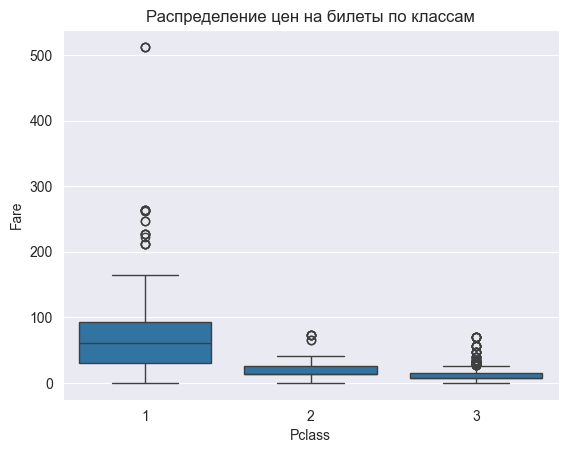

In [28]:
df_clean = df[['Fare', 'Pclass']].dropna()
sns.boxplot(data=df_clean, x='Pclass', y='Fare')
plt.title('Распределение цен на билеты по классам')
plt.show()

5. Визуализируйте распределение долей выживших среди мужчин, женщин и детей(до 16 лет)

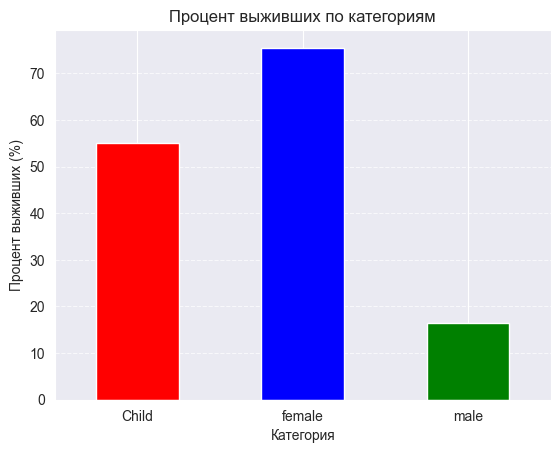

In [39]:
df['AgeGroup'] = df['Age'].apply(lambda x: 'Child' if x <= 16 else 'Adult')
df['Category'] = df.apply(lambda row: 'Child' if row['AgeGroup'] == 'Child' else row['Sex'], axis=1)

survival_by_category = df.groupby('Category')['Survived'].mean() * 100

survival_by_category.plot(kind='bar', alpha=1, color=['red', 'blue', 'green'])
plt.title('Процент выживших по категориям')
plt.ylabel('Процент выживших (%)')
plt.xlabel('Категория')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

6. Сравните плотности распределения возростов выживших и умерших пассажиров, сделайте выводы

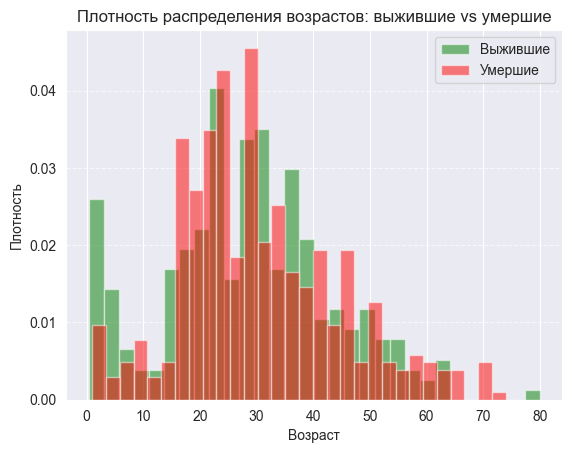

In [44]:
df_clean = df[['Age', 'Survived']].dropna()

survived = df_clean[df_clean['Survived'] == 1]['Age']
not_survived = df_clean[df_clean['Survived'] == 0]['Age']

plt.hist(survived, bins=30, density=True, alpha=0.5, label='Выжившие', color='green')
plt.hist(not_survived, bins=30, density=True, alpha=0.5, label='Умершие', color='red')

plt.title('Плотность распределения возрастов: выжившие vs умершие')
plt.xlabel('Возраст')
plt.ylabel('Плотность')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

7. Постройте круговую диаграмму отображающую выживаемость мужчин и женщин в разных классах обслуживания(визуализация должна быть интуитивно понятная без объяснений, женщины и мужчины соответствующих классов объеденены визуально в одну группу и 2 подгруппы)*

\* Задание на доп. балл

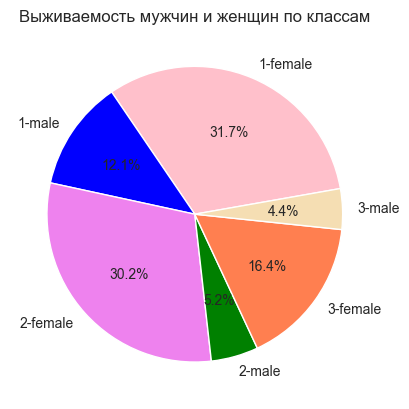

In [31]:
df_clean = df[['Pclass', 'Sex', 'Survived']].dropna()

survival_by_class_sex = df_clean.groupby(['Pclass', 'Sex'])['Survived'].mean()

labels = [f"{pclass}-{sex}" for pclass, sex in survival_by_class_sex.index]

colors_map = {
    (1, 'female'): 'pink',
    (1, 'male'): 'blue',
    (2, 'female'): 'violet',
    (2, 'male'): 'green',
    (3, 'female'): 'coral',
    (3, 'male'): 'wheat',
}

colors = [colors_map[(pclass, sex)] for pclass, sex in survival_by_class_sex.index]

plt.pie(survival_by_class_sex.values, labels=labels, autopct='%1.1f%%', startangle=10, colors=colors)
plt.title('Выживаемость мужчин и женщин по классам')
plt.show()